In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm
from scipy.stats import weibull_min
from math import exp
import scipy.stats as stats
from scipy import integrate
import pandas as pd

# Question 1

In [ ]:
def mle_weibull(x,n,k):  # gives MLE for Q1
  return  (sum(x**k)/n)**(1/float(k))

In [ ]:
r=int(1e5) # 10^5 MLEs have been estimated
mle=np.zeros((5,r))
for j in range(r):
  i = 0; 
  for n in np.geomspace(1,1e4,num=5):
    k = 1; theta = 2 
    x = weibull_min.rvs(k, loc=0, scale=theta, size=int(n))
    mle[i,j] = mle_weibull(x,n,k);i+=1
# mean is calculated
E_theta_est=np.sum(mle,axis=1)/r

In [ ]:
# variance is calculated
var = [sum((k-E_theta_est[i])**2 for k in mle[i,:])/len(mle[i,:]) for i in [0,1,2,3,4] ]

In [ ]:
# storing the data generated
np.savetxt("data_mle.csv",mle,delimiter=',')

In [ ]:
df = pd.read_csv('data.csv',header = None)
df.iloc[1]

In [ ]:
data=np.zeros((2,5))
data[0,:]=E_theta_est
data[1,:]=np.asarray(var)
df1=pd.DataFrame(data,columns=[1,10,100,1000,10000],index=['E_theta_est','Variance(theta_hat)'])
df1

,1,10,100,1000,10000
E_theta_est,1.989850,2.001410,2.000320,1.999802,2.000005
Variance(theta_hat),3.949652,0.404727,0.040194,0.004029,0.000401



# PDF Plots for Q1

**PDF plots for sqrt(N)*(theta_hat-theta)**





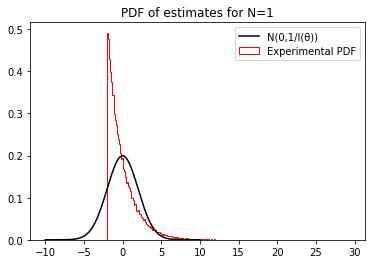

In [ ]:
# Ploting the PDf and CDf of sqrt(N)*(theta_hat-theta)
# calculating √N(Theta_hat-theta)
mle0=[(10**0)**.5*(k-theta) for k in mle[0,:]]; 
mle1=[(10**1)**.5*(k-theta) for k in mle[1,:]]; 
mle2=[(10**2)**.5*(k-theta) for k in mle[2,:]]
mle3=[(10**3)**.5*(k-theta) for k in mle[3,:]]; 
mle4=[(10**4)**.5*(k-theta) for k in mle[4,:]]

_ = plt.hist(mle0,bins='auto',density=True,cumulative=False,histtype='step',color='red',label="Experimental PDF")

# plotting the normal PDF
x1 = np.linspace(-10,10, 10000)
_ = plt.plot(x1, stats.norm.pdf(x1, 0, theta), color="k",label="N(0,1/I(θ))")
_ = plt.title("PDF of estimates for N=1")
_ = plt.legend()


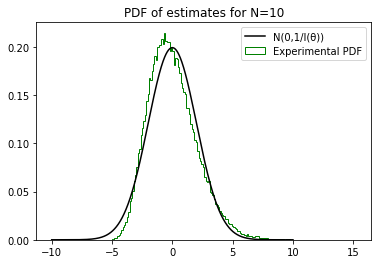

In [ ]:
_ = plt.hist(mle1,bins='auto',density=True,cumulative=False,histtype='step',color='green',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, theta), color="k",label="N(0,1/I(θ))")
_ = plt.title("PDF of estimates for N=10")
_ = plt.legend()


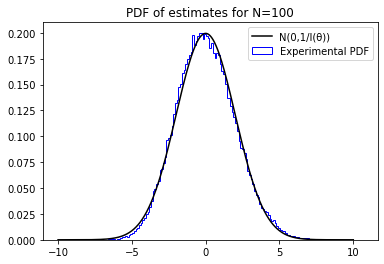

In [ ]:
_ = plt.hist(mle2,bins='auto',density=True,cumulative=False,histtype='step',color='blue',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, theta), color="k",label="N(0,1/I(θ))")
_ = plt.title("PDF of estimates for N=100")
_ = plt.legend()

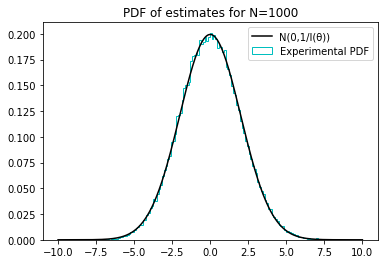

In [ ]:
_ = plt.hist(mle3,bins='auto',density=True,cumulative=False,histtype='step',color='c',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, theta), color="k",label="N(0,1/I(θ))")
_ = plt.title("PDF of estimates for N=1000")
_ = plt.legend()

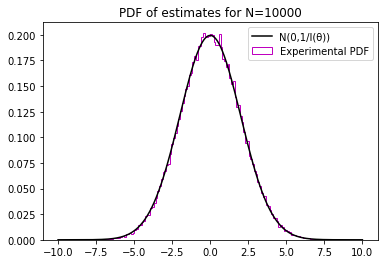

In [ ]:
_ = plt.hist(mle4,bins='auto',density=True,cumulative=False,histtype='step',color='m',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, theta), color="k",label="N(0,1/I(θ))")
_ = plt.title("PDF of estimates for N=10000")
_ = plt.legend()

# CDF plots for Q1

**CDF Plots for sqrt(N)*(theta_hat-theta)**





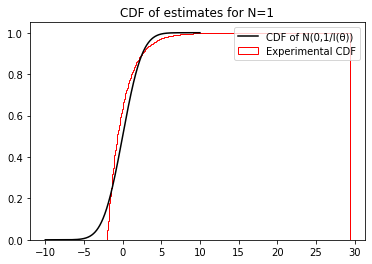

In [ ]:
_ = plt.hist(mle0,bins='auto',density=True,cumulative=True,histtype='step',color='red',label="Experimental CDF")
_ = plt.plot(x1, stats.norm.cdf(x1, 0, theta), color="k",label="CDF of N(0,1/I(θ))")
_ = plt.title("CDF of estimates for N=1")
_ = plt.legend()

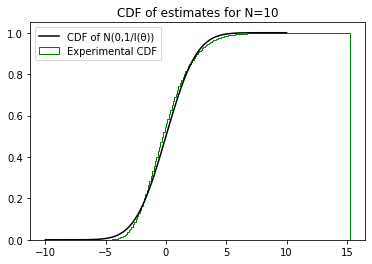

In [ ]:
_ = plt.hist(mle1,bins='auto',density=True,cumulative=True,histtype='step',color='green',label="Experimental CDF")
_ = plt.plot(x1, stats.norm.cdf(x1, 0, theta), color="k",label="CDF of N(0,1/I(θ))")
_ = plt.title("CDF of estimates for N=10")
_ = plt.legend()

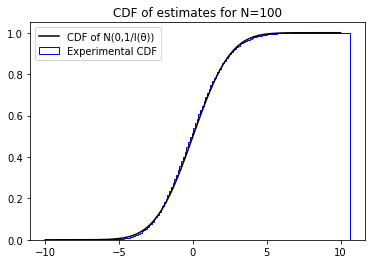

In [ ]:
_ = plt.hist(mle2,bins='auto',density=True,cumulative=True,histtype='step',color='blue',label="Experimental CDF")
_ = plt.plot(x1, stats.norm.cdf(x1, 0, theta), color="k",label="CDF of N(0,1/I(θ))")
_ = plt.title("CDF of estimates for N=100")
_ = plt.legend()

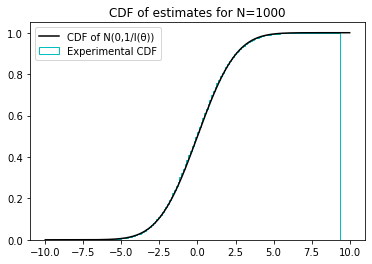

In [ ]:
_ = plt.hist(mle3,bins='auto',density=True,cumulative=True,histtype='step',color='c',label="Experimental CDF")
_ = plt.plot(x1, stats.norm.cdf(x1, 0, theta), color="k",label="CDF of N(0,1/I(θ))")
_ = plt.title("CDF of estimates for N=1000")
_ = plt.legend()

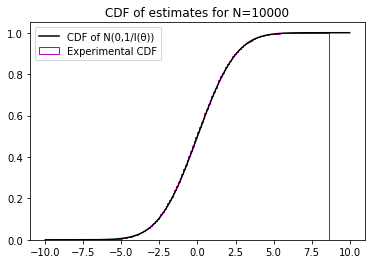

In [ ]:
_ = plt.hist(mle4,bins='auto',density=True,cumulative=True,histtype='step',color='m',label="Experimental CDF")
_ = plt.plot(x1, stats.norm.cdf(x1, 0, theta), color="k",label="CDF of N(0,1/I(θ))")
_ = plt.title("CDF of estimates for N=10000")
_ = plt.legend()

# Question 2 and 3

$l'(\theta) = \dfrac{\sum_{i=1}^{N}{y_i} - N(\mu+\sigma)}{\sigma^2} - \dfrac{\sum_{i=1}^{N}{(y_i-\mu)}e^{(-(y_i-\mu)/\sigma)}}{\sigma^2}$
$l''(\theta) = \dfrac{-2\sum_{i=1}^{N}{y_i} + N(2\mu+\sigma)}{\sigma^3} + \sum_{i=1}^{N}{e^{-(y_i-\mu)/\sigma}[\dfrac{2(y_i-\mu)}{\sigma^3} - \dfrac{(y_i-\mu)}{\sigma^4}^2]}$


In [ ]:
 def newton_raphson_cauchy_RV(y, mu, n, tolerance,n_iter=100):
  sigma = 1 #initial guess
  sum=0
  for k in y: # calculated to find l_dash
    sum += (k-mu)/sigma**2*exp(-1*(k-mu)/sigma)
  l_dash = (np.sum(y)-n*(mu+sigma))/(sigma**2) - sum
  iter_ = 0 
  while abs(l_dash) > tolerance : # when the derivative is small stop furthur iterations
    iter_ += 1
    if iter_ > n_iter:
      break
    sum = 0
    for k in y:# calculated to find l_double_dash
      sum += exp(-1*(k-mu)/sigma)*(2*(k-mu)/sigma**3-((k-mu)/sigma**2)**2)
    l_double_dash = (-2*np.sum(y)+n*(2*mu+sigma))/sigma**3 + sum
    sigma = sigma - l_dash/l_double_dash
    sum=0
    for k in y:# calculated to find l_dash
      sum += (k-mu)/sigma**2*exp(-1*(k-mu)/sigma)
    l_dash = (np.sum(y)-n*(mu+sigma))/(sigma**2) - sum
  return sigma

In [ ]:
def get_s(x,d): # gives the excess value from x
  s=[]
  for k in x:
    for l in k:
      if l > d:
        s.append(l-d)
  return s

In [ ]:
lam = 0.2; k = 20; r= int(0.5*1e4) # 5000 mle estimates have been found
mu=14.9787; tolerence=1e-4 #tolerence for l_dash
mle_gev=np.zeros((5,r)); mle_gpd=np.zeros((5,r)); mle_gpd_L = np.zeros((5,r))
i=0;
for n in [1,10,100,1000,10000]:
  j=0
  while j < r:
    x=np.random.exponential(1/float(lam),(n,k))
    y = np.zeros(x.shape[0])
    for t in range(x.shape[0]):
      y[t] = max(x[t,:])  
    s=get_s(x,23)
    if len(s) == 0:
      continue
    else:
      mle_gpd[i,j] = sum(s)/len(s)
      mle_gpd_L[i,j] = len(s)
      mle_gev[i,j] = newton_raphson_cauchy_RV(y,mu,n,tolerence)
      j += 1
  i += 1
# means and variance are calculated
E_sigma_gev = np.sum(mle_gev,axis=1)/r
var_gev = [sum((k-E_sigma_gev[i])**2 for k in mle_gev[i,:])/len(mle_gev[i,:]) for i in [0,1,2,3,4] ]
E_sigma_gpd = np.sum(mle_gpd,axis=1)/r
var_gpd = [sum((k-E_sigma_gpd[i])**2 for k in mle_gpd[i,:])/len(mle_gpd[i,:]) for i in [0,1,2,3,4] ]


In [ ]:
# the expected values and variance of the experiment
data=np.zeros((4,5))
data[0,:] = E_sigma_gev
data[1,:] = var_gev
data[2,:] = E_sigma_gpd
data[3,:] = var_gpd
df=pd.DataFrame(data,columns=[1,10,100,1000,10000],index=['E_sigma_gev','var_gev','E_sigma_gpd','var_gpd'])
df

,1,10,100,1000,10000
E_sigma_gev,9.827992,4.875565,4.806824,4.813145,4.812420
var_gev,14.545630,1.241221,0.127787,0.012639,0.001259
E_sigma_gpd,5.022941,4.897747,4.991510,4.995505,4.999416
var_gpd,24.279605,14.008253,1.291930,0.123767,0.012463


In [ ]:
# storing data because the data generation takes more time
np.savetxt("data_gev.csv",mle_gev,delimiter=',')
np.savetxt("data_gpd.csv",mle_gpd,delimiter=',')
np.savetxt("data_gpd_L.csv",mle_gpd_L,delimiter=',')

# PDF plots for Q2

$\partial_{\sigma}^2log(f(x,\theta) = -(\dfrac{-1}{\sigma^2} + \dfrac{2(x-\mu)}{\sigma^3} + e^{-(x-\mu)/\sigma}.[\dfrac{(x-\mu)}{\sigma^4}^2 - 2\dfrac{(x-\mu)}{\sigma^3}]) $

In [ ]:
#Fisher info for Question 2 calculated using Quad function
sigma = 4.81
def pdf(x):
  return 1/sigma*exp(-(x-mu)/sigma)*exp(-1*exp(-(x-mu)/sigma))
def func(x):
  return (-1/sigma**2 + 2*(x-mu)/sigma**3 + exp(-(x-mu)/sigma)*(((x-mu)/sigma**2)**2-2*(x-mu)/sigma**3)) * pdf(x)
sd,_ = np.sqrt(integrate.quad(func,0,np.inf))
sd = 1/sd

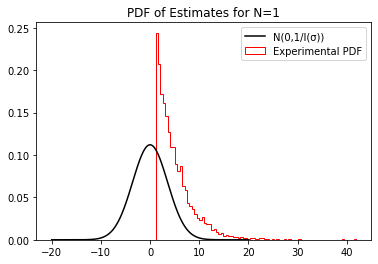

In [ ]:
# plots for PDF and CDF of sqrt(N)*(sigma_hat-sigma) for question 2 
sigma = 4.81 # the estimated sigma
mle0=[(10**0)**.5*(k-sigma) for k in mle_gev[0,:]] 
mle1=[(10**1)**.5*(k-sigma) for k in mle_gev[1,:]]
mle2=[(10**2)**.5*(k-sigma) for k in mle_gev[2,:]]
mle3=[(10**3)**.5*(k-sigma) for k in mle_gev[3,:]]
mle4=[(10**4)**.5*(k-sigma) for k in mle_gev[4,:]]

_ = plt.hist(mle0,bins='auto',density=True,cumulative=False,histtype='step',color='red',label="Experimental PDF")

x1 = np.linspace(-20,20, 10000)
_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=1")
_ = plt.legend()


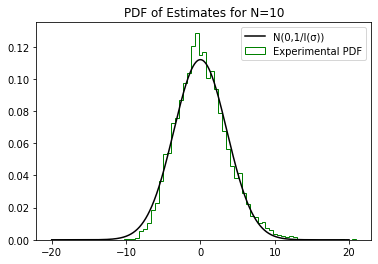

In [ ]:
_ = plt.hist(mle1,bins='auto',density=True,cumulative=False,histtype='step',color='green',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=10")
_ = plt.legend()


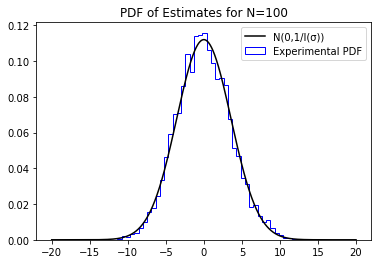

In [ ]:
_ = plt.hist(mle2,bins='auto',density=True,cumulative=False,histtype='step',color='blue',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=100")
_ = plt.legend()

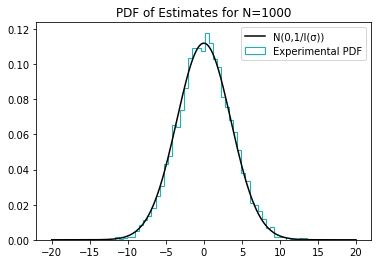

In [ ]:
_ = plt.hist(mle3,bins='auto',density=True,cumulative=False,histtype='step',color='c',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=1000")
_ = plt.legend()

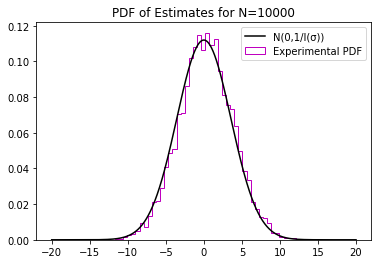

In [ ]:
_ = plt.hist(mle4,bins='auto',density=True,cumulative=False,histtype='step',color='m',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=10000")
_ = plt.legend()

# CDF plots for Q2

**CDF of GEV**

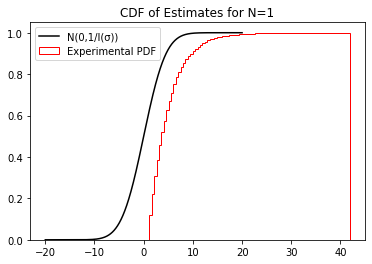

In [ ]:
_ = plt.hist(mle0,bins='auto',density=True,cumulative=True,histtype='step',color='red',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=1")
_ = plt.legend()

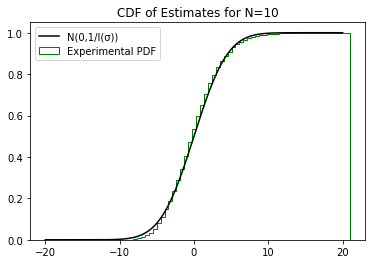

In [ ]:
_ = plt.hist(mle1,bins='auto',density=True,cumulative=True,histtype='step',color='green',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=10")
_ = plt.legend()

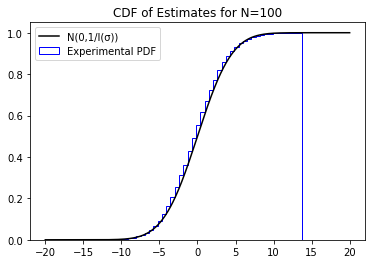

In [ ]:
_ = plt.hist(mle2,bins='auto',density=True,cumulative=True,histtype='step',color='blue',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=100")
_ = plt.legend()

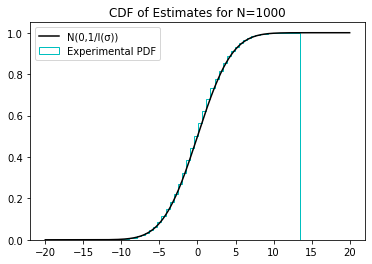

In [ ]:
_ = plt.hist(mle3,bins='auto',density=True,cumulative=True,histtype='step',color='c',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=1000")
_ = plt.legend()

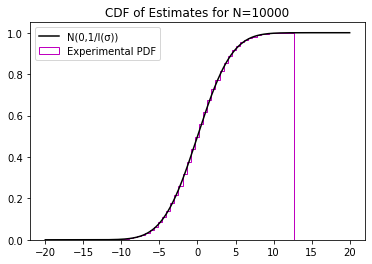

In [ ]:
_ = plt.hist(mle4,bins='auto',density=True,cumulative=True,histtype='step',color="m",label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=10000")
_ = plt.legend()

# PDF plots for Q3

**PDF of GPD**

In [ ]:
#fisher Information for question 3
sigma=5
sd = sigma

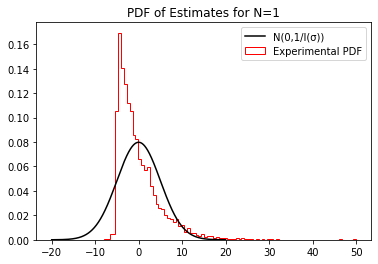

In [ ]:
# plots for PDF and CDF of sqrt(L)*(sigma_nat-sigma) in question 3
sigma = 5
mle0=[(mle_gpd_L[0,k])**.5*(mle_gpd[0,k]-sigma) for k in range(len(mle_gpd[0,:]))]; 
mle1=[(mle_gpd_L[1,k])**.5*(mle_gpd[1,k]-sigma) for k in range(len(mle_gpd[1,:]))]; 
mle2=[(mle_gpd_L[2,k])**.5*(mle_gpd[2,k]-sigma) for k in range(len(mle_gpd[2,:]))]; 
mle3=[(mle_gpd_L[3,k])**.5*(mle_gpd[3,k]-sigma) for k in range(len(mle_gpd[3,:]))]; 
mle4=[(mle_gpd_L[4,k])**.5*(mle_gpd[4,k]-sigma) for k in range(len(mle_gpd[4,:]))]; 


_ = plt.hist(mle0,bins='auto',density=True,cumulative=False,histtype='step',color='red',label="Experimental PDF")

x1 = np.linspace(-20,20, 10000)
_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=1")
_ = plt.legend()


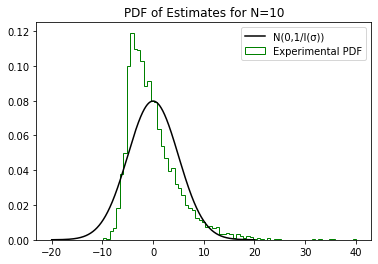

In [ ]:
_ = plt.hist(mle1,bins='auto',density=True,cumulative=False,histtype='step',color='green',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=10")
_ = plt.legend()


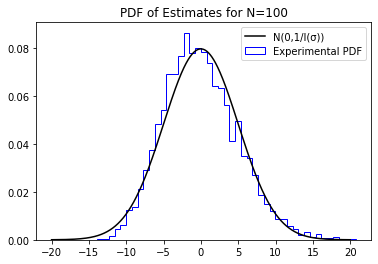

In [ ]:
_ = plt.hist(mle2,bins='auto',density=True,cumulative=False,histtype='step',color='blue',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=100")
_ = plt.legend()

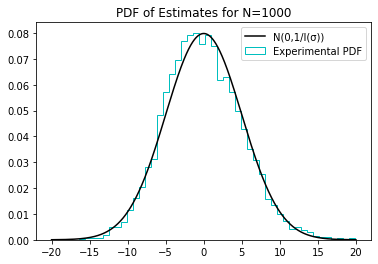

In [ ]:
_ = plt.hist(mle3,bins='auto',density=True,cumulative=False,histtype='step',color='c',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=1000")
_ = plt.legend()

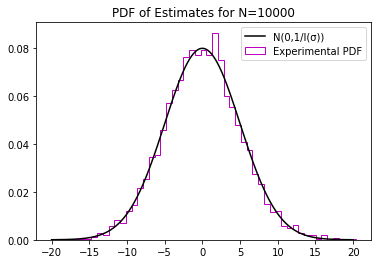

In [ ]:
_ = plt.hist(mle4,bins='auto',density=True,cumulative=False,histtype='step',color='m',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.pdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("PDF of Estimates for N=10000")
_ = plt.legend()

# CDF plots for Q3

**CDF of GPD**

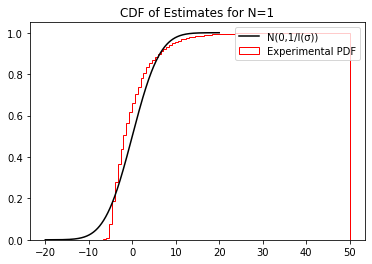

In [ ]:
_ = plt.hist(mle0,bins='auto',density=True,cumulative=True,histtype='step',color='red',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=1")
_ = plt.legend()

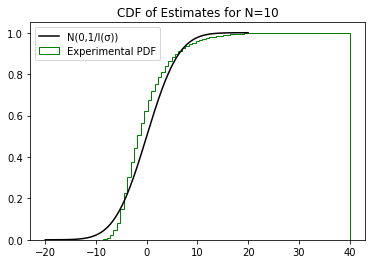

In [ ]:
_ = plt.hist(mle1,bins='auto',density=True,cumulative=True,histtype='step',color='green',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=10")
_ = plt.legend()

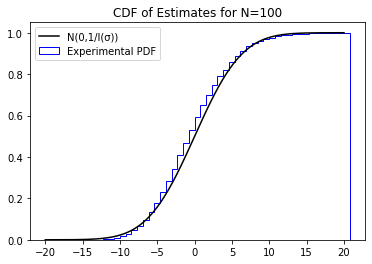

In [ ]:
_ = plt.hist(mle2,bins='auto',density=True,cumulative=True,histtype='step',color='blue',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=100")
_ = plt.legend()

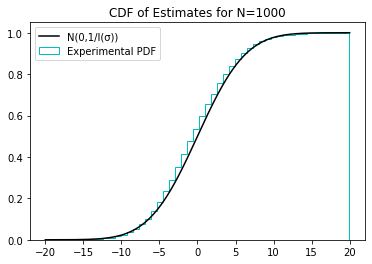

In [ ]:
_ = plt.hist(mle3,bins='auto',density=True,cumulative=True,histtype='step',color='c',label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=1000")
_ = plt.legend()

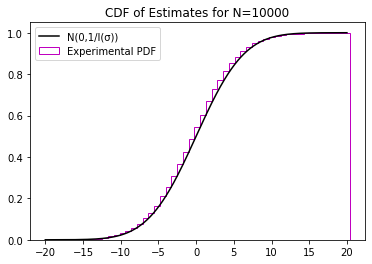

In [ ]:
_ = plt.hist(mle4,bins='auto',density=True,cumulative=True,histtype='step',color="m",label="Experimental PDF")

_ = plt.plot(x1, stats.norm.cdf(x1, 0, sd), color="k",label="N(0,1/I(σ))")
_ = plt.title("CDF of Estimates for N=10000")
_ = plt.legend()

**END OF CODE**